In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
print(tf.__version__)

2.6.3


In [39]:
tf.compat.v1.disable_eager_execution()

hello = tf.constant('hello,tensorflow!')
sess= tf.compat.v1.Session()
print(sess.run(hello))

b'hello,tensorflow!'


In [40]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

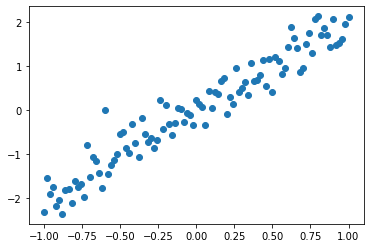

In [41]:
plt.scatter(x_train, y_train)
plt.show()

In [42]:
learning_rate = 0.01
training_epochs = 100

In [43]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

In [46]:
# here is a error: AttributeError: module 'tensorflow' has no attribute 'placeholder'
# analysis: Tensorflow 2.x calls the API of tensorflow 1.x
# Solution: import new tf

import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

In [47]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [48]:
def model(X, w):
    return tf.multiply(X, w)

In [49]:
w = tf.Variable(0.0, name="weights")
y_model = model(X, w)
cost = tf.square(Y-y_model)

In [50]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [51]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [52]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

In [54]:
w_val = sess.run(w)

In [55]:
sess.close()

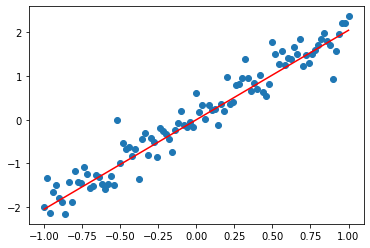

In [56]:
plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

In [57]:
learning_rate = 0.01
training_epochs = 40

In [58]:
trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0

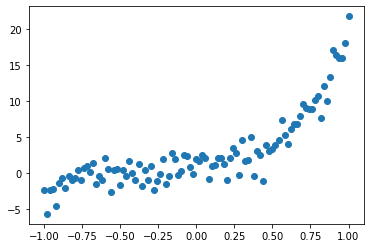

In [59]:
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
    
trY += np.random.randn(*trX.shape) * 1.5

plt.scatter(trX, trY)
plt.show()

In [60]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [69]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [70]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

In [71]:
cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [72]:
for epoch in range(training_epochs):
    for(x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X:x, Y:y})

In [73]:
w_val = sess.run(w)
print(w_val)

[0.75534713 2.4667845  4.1067553  4.271014   3.4772947  4.8385267 ]


In [74]:
sess.close()

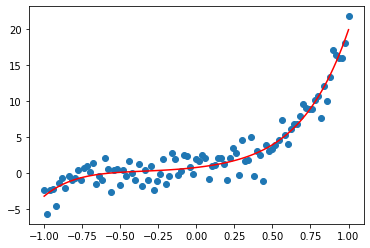

In [75]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()

In [76]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [77]:
learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

x_dataset = np.linspace(-1, 1, 100)

num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0

In [79]:
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

In [80]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [81]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)), tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
              2*x_train.size)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [82]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [83]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for reg_lambda in np.linspace(0, 1, 100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X:x_train, Y:y_train})
    final_cost = sess.run(cost, feed_dict={X:x_test, Y:y_test})
    print('reg lambda', reg_lambda)
    print('final cost', final_cost)

sess.close()

reg lambda 0.0
final cost 0.11510811
reg lambda 0.010101010101010102
final cost 0.09142849
reg lambda 0.020202020202020204
final cost 0.08182387
reg lambda 0.030303030303030304
final cost 0.07572457
reg lambda 0.04040404040404041
final cost 0.07139126
reg lambda 0.05050505050505051
final cost 0.06821203
reg lambda 0.06060606060606061
final cost 0.065839574
reg lambda 0.07070707070707072
final cost 0.06404398
reg lambda 0.08080808080808081
final cost 0.0626661
reg lambda 0.09090909090909091
final cost 0.06159391
reg lambda 0.10101010101010102
final cost 0.060747813
reg lambda 0.11111111111111112
final cost 0.060070705
reg lambda 0.12121212121212122
final cost 0.059521254
reg lambda 0.13131313131313133
final cost 0.059069306
reg lambda 0.14141414141414144
final cost 0.05869251
reg lambda 0.15151515151515152
final cost 0.058374207
reg lambda 0.16161616161616163
final cost 0.058101844
reg lambda 0.17171717171717174
final cost 0.05786588
reg lambda 0.18181818181818182
final cost 0.05765896
